In [19]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#Loading training dataset
df=pd.read_csv("sheet1.csv")

In [21]:
#Viewing the contents of the dataset
df

,id,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,t,u,v,target
0,1,15-01-2021,1.5570,27337.8060,17558,4.88,424741,424745.88,101,105,...,443,940,30.63,0.0,0.0,356,27337,1530.0084,00:03:21,5.785
1,2,24-07-2019,1.2616,1553.0296,1231,5.64,21688,21693.64,1,4,...,14,31,27.86,0.0,0.0,8,1553,60.2926,00:02:19,0.826
2,3,09-08-2020,1.8000,4563.0000,2535,6.15,57690,57696.15,27,30,...,162,232,25.98,0.0,0.0,103,4563,230.7383,00:03:02,1.201
3,4,12-06-2019,1.2996,2117.0484,1629,5.76,27800,27805.76,9,3,...,34,64,26.28,0.0,0.0,19,2117,100.3671,00:02:50,0.963
4,5,02-06-2021,2.4762,231408.3186,93453,4.26,4175116,4175120.26,464,417,...,2325,9126,33.26,0.0,0.0,1997,231404,17511.5046,00:04:32,59.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,30-06-2021,2.3033,245207.0147,106459,4.16,4449518,4449522.16,825,423,...,2978,11819,38.56,0.0,0.0,2269,245204,21847.0122,00:05:20,125.014
65,66,20-08-2021,1.8174,584179.6038,321437,5.73,7148710,7148715.73,11582,1405,...,4959,58446,45.70,1.0,2.0,3785,584188,64133.8247,00:06:35,317.818
66,67,24-09-2021,2.1319,652107.7039,305881,6.08,7768271,7768277.08,4741,1055,...,4804,56677,47.81,1.0,0.0,3284,652105,54463.2654,00:05:00,397.066
67,68,28-12-2020,1.6154,23749.6108,14702,4.83,373796,373800.83,110,74,...,487,1106,30.22,0.0,0.0,423,23750,1414.7931,00:03:34,6.017


In [22]:
#First we check for any null values
df.isnull().values.sum()

16

In [23]:
y=df['target']
df.drop(['a','id','e','j','r','target'],axis=1, inplace=True)
for i in range(69):
  minute = float(df.v[i][4])
  df.loc[i,'v'] = minute
# x.iloc[:,6:]
# c,d,f,g,h,i,l,m,n,o,s,t,u
df

,b,c,d,f,g,h,i,k,l,m,n,o,p,q,s,t,u,v
0,1.5570,27337.8060,17558,424741,424745.88,101,105,35.51,20,87,443,940,30.63,0.0,356,27337,1530.0084,3.0
1,1.2616,1553.0296,1231,21688,21693.64,1,4,33.50,1,6,14,31,27.86,0.0,8,1553,60.2926,2.0
2,1.8000,4563.0000,2535,57690,57696.15,27,30,32.13,11,59,162,232,25.98,0.0,103,4563,230.7383,3.0
3,1.2996,2117.0484,1629,27800,27805.76,9,3,32.04,0,15,34,64,26.28,0.0,19,2117,100.3671,2.0
4,2.4762,231408.3186,93453,4175116,4175120.26,464,417,37.52,157,328,2325,9126,33.26,0.0,1997,231404,17511.5046,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2.3033,245207.0147,106459,4449518,4449522.16,825,423,42.72,171,709,2978,11819,38.56,0.0,2269,245204,21847.0122,5.0
65,1.8174,584179.6038,321437,7148710,7148715.73,11582,1405,51.43,404,1174,4959,58446,45.70,1.0,3785,584188,64133.8247,6.0
66,2.1319,652107.7039,305881,7768271,7768277.08,4741,1055,53.89,521,1520,4804,56677,47.81,1.0,3284,652105,54463.2654,5.0
67,1.6154,23749.6108,14702,373796,373800.83,110,74,35.05,35,64,487,1106,30.22,0.0,423,23750,1414.7931,3.0


In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(df)

In [34]:
df_x_t = pd.DataFrame(X_train)
Y_train = y
X_test = X_train[60:69]
X_train = X_train[0:60]
Y_test = Y_train[60:69]
Y_train = Y_train[0:60]

In [26]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaled_features=df.copy()
col_names = df.columns
features=scaled_features[col_names]
scaler=StandardScaler().fit(features.values)
features=scaler.transform(features.values)
# pd.DataFrame(scaled_features,columns=['c','d','f','g','h','i','l','m','n','o','s','t','u'])
scaled_features[col_names] = features
scaled_features

,b,c,d,f,g,h,i,k,l,m,n,o,p,q,s,t,u,v
0,-0.254050,-0.278080,-0.204403,-0.296342,-0.296343,-0.176765,-0.075846,-0.041914,-0.307681,-0.235502,-0.210029,-0.269755,0.187510,-0.360041,-0.197354,-0.278085,-0.307902,0.320935
1,-1.078447,-0.482476,-0.475224,-0.511893,-0.511894,-0.244129,-0.488472,-0.396154,-0.511300,-0.487074,-0.575782,-0.360372,-0.274270,-0.360041,-0.600112,-0.482475,-0.436069,-0.564846
2,0.424110,-0.458616,-0.453594,-0.492640,-0.492640,-0.226614,-0.382252,-0.637601,-0.404132,-0.322466,-0.449602,-0.340335,-0.587681,-0.360041,-0.490164,-0.458615,-0.421205,0.320935
3,-0.972398,-0.478005,-0.468622,-0.508625,-0.508625,-0.238740,-0.492558,-0.653463,-0.522017,-0.459122,-0.558731,-0.357082,-0.537669,-0.360041,-0.587382,-0.478004,-0.432574,-0.564846
4,2.311237,1.339590,1.054490,1.709346,1.709345,0.067764,1.198800,0.312326,1.160521,0.513001,1.394510,0.546293,0.625951,-0.360041,1.701862,1.339555,1.085767,1.206716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.828711,1.448973,1.270224,1.856095,1.856095,0.310945,1.223312,1.228768,1.310556,1.696320,1.951239,0.814754,1.509502,-0.360041,2.016661,1.448948,1.463845,2.092497
65,0.472670,4.136013,4.836127,3.299614,3.299615,7.557218,5.235179,2.763808,3.807572,3.140528,3.640182,5.462922,2.699795,2.777460,3.771208,4.136075,5.151474,2.978278
66,1.350371,4.674480,4.578095,3.630953,3.630954,2.948893,3.805288,3.197355,5.061438,4.215143,3.508034,5.286573,3.051548,2.777460,3.191374,4.674454,4.308151,2.092497
67,-0.091069,-0.306523,-0.251776,-0.323587,-0.323588,-0.170703,-0.202494,-0.122984,-0.146929,-0.306936,-0.172516,-0.253207,0.119160,-0.360041,-0.119811,-0.306519,-0.317950,0.320935


<Axes: >

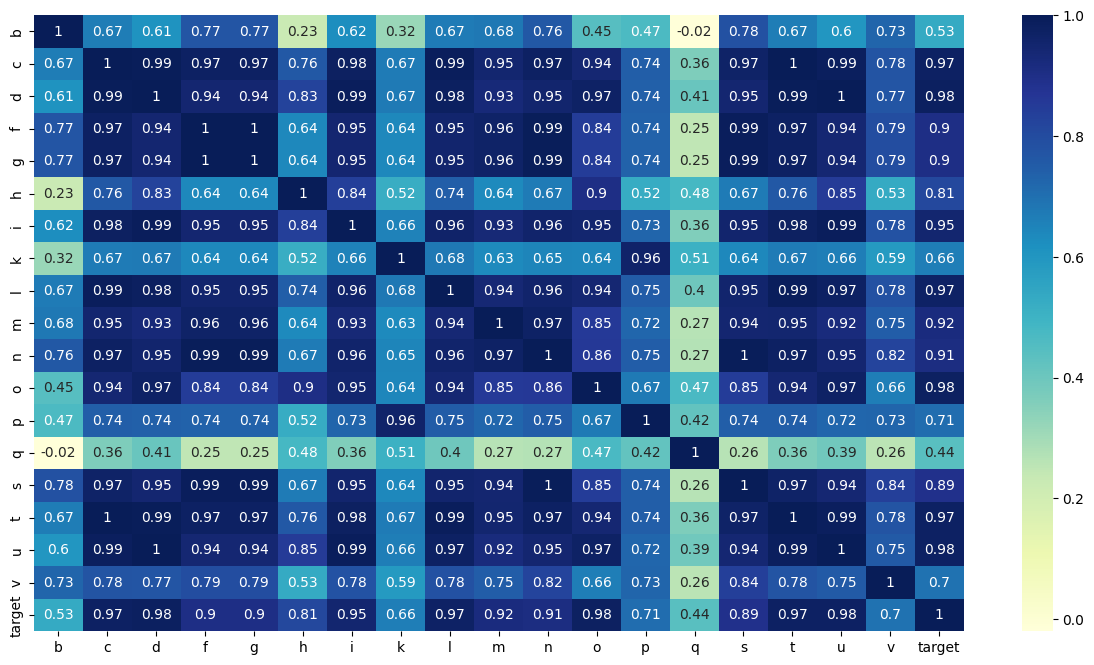

In [27]:
plt.figure(figsize=(15,8))
scaled_features_y=scaled_features.join(y)
sns.heatmap(scaled_features_y.corr(),cmap="YlGnBu",annot=True)


In [29]:
sns.pairplot(scaled_features_y)
scaled_features_y.plot(x="d", y="target",
        kind="scatter")
#c,d,f,h,i,j,k,l,m,n

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x792ef56e9e10> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x792ef56e9090> (for post_execute):


KeyboardInterrupt: ignored

In [30]:
scaled_features['v']=scaled_features['n']-scaled_features['m']

In [10]:
# plt.figure(figsize=(15,8))
scaled_features_new=scaled_features.join(y)
# sns.heatmap(scaled_features_y.corr(),cmap="YlGnBu",annot=True)
scaled_features_new

,id,b,c,d,e,f,g,h,i,j,...,n,o,p,q,r,s,t,u,v,target
0,1,1.5570,-0.278080,-0.204403,4.88,-0.296342,-0.296343,-0.176765,-0.075846,97.92,...,-0.210029,-0.269755,30.63,0.0,0.0,-0.197354,-0.278085,-0.307902,0.025473,5.785
1,2,1.2616,-0.482476,-0.475224,5.64,-0.511893,-0.511894,-0.244129,-0.488472,96.88,...,-0.575782,-0.360372,27.86,0.0,0.0,-0.600112,-0.482475,-0.436069,-0.088708,0.826
2,3,1.8000,-0.458616,-0.453594,6.15,-0.492640,-0.492640,-0.226614,-0.382252,95.47,...,-0.449602,-0.340335,25.98,0.0,0.0,-0.490164,-0.458615,-0.421205,-0.127136,1.201
3,4,1.2996,-0.478005,-0.468622,5.76,-0.508625,-0.508625,-0.238740,-0.492558,100.00,...,-0.558731,-0.357082,26.28,0.0,0.0,-0.587382,-0.478004,-0.432574,-0.099609,0.963
4,5,2.4762,1.339590,1.054490,4.26,1.709346,1.709345,0.067764,1.198800,98.31,...,1.394510,0.546293,33.26,0.0,0.0,1.701862,1.339555,1.085767,0.881509,59.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2.3033,1.448973,1.270224,4.16,1.856095,1.856095,0.310945,1.223312,98.57,...,1.951239,0.814754,38.56,0.0,0.0,2.016661,1.448948,1.463845,0.254919,125.014
65,66,1.8174,4.136013,4.836127,5.73,3.299614,3.299615,7.557218,5.235179,99.31,...,3.640182,5.462922,45.70,1.0,2.0,3.771208,4.136075,5.151474,0.499654,317.818
66,67,2.1319,4.674480,4.578095,6.08,3.630953,3.630954,2.948893,3.805288,99.09,...,3.508034,5.286573,47.81,1.0,0.0,3.191374,4.674454,4.308151,-0.707109,397.066
67,68,1.6154,-0.306523,-0.251776,4.83,-0.323587,-0.323588,-0.170703,-0.202494,96.93,...,-0.172516,-0.253207,30.22,0.0,0.0,-0.119811,-0.306519,-0.317950,0.134420,6.017


<Axes: >

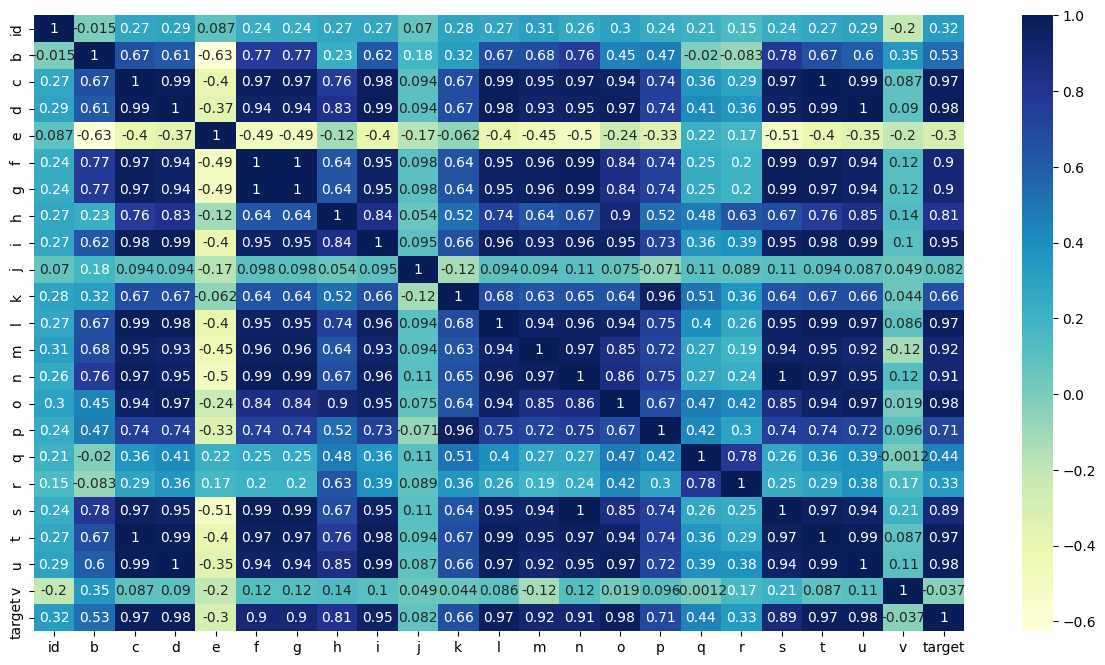

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_features_new.corr(),cmap="YlGnBu",annot=True)

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'c'}>, <Axes: title={'center': 'd'}>,
        <Axes: title={'center': 'e'}>],
       [<Axes: title={'center': 'f'}>, <Axes: title={'center': 'g'}>,
        <Axes: title={'center': 'h'}>, <Axes: title={'center': 'i'}>,
        <Axes: title={'center': 'j'}>],
       [<Axes: title={'center': 'k'}>, <Axes: title={'center': 'l'}>,
        <Axes: title={'center': 'm'}>, <Axes: title={'center': 'n'}>,
        <Axes: title={'center': 'o'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'q'}>,
        <Axes: title={'center': 'r'}>, <Axes: title={'center': 's'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'u'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

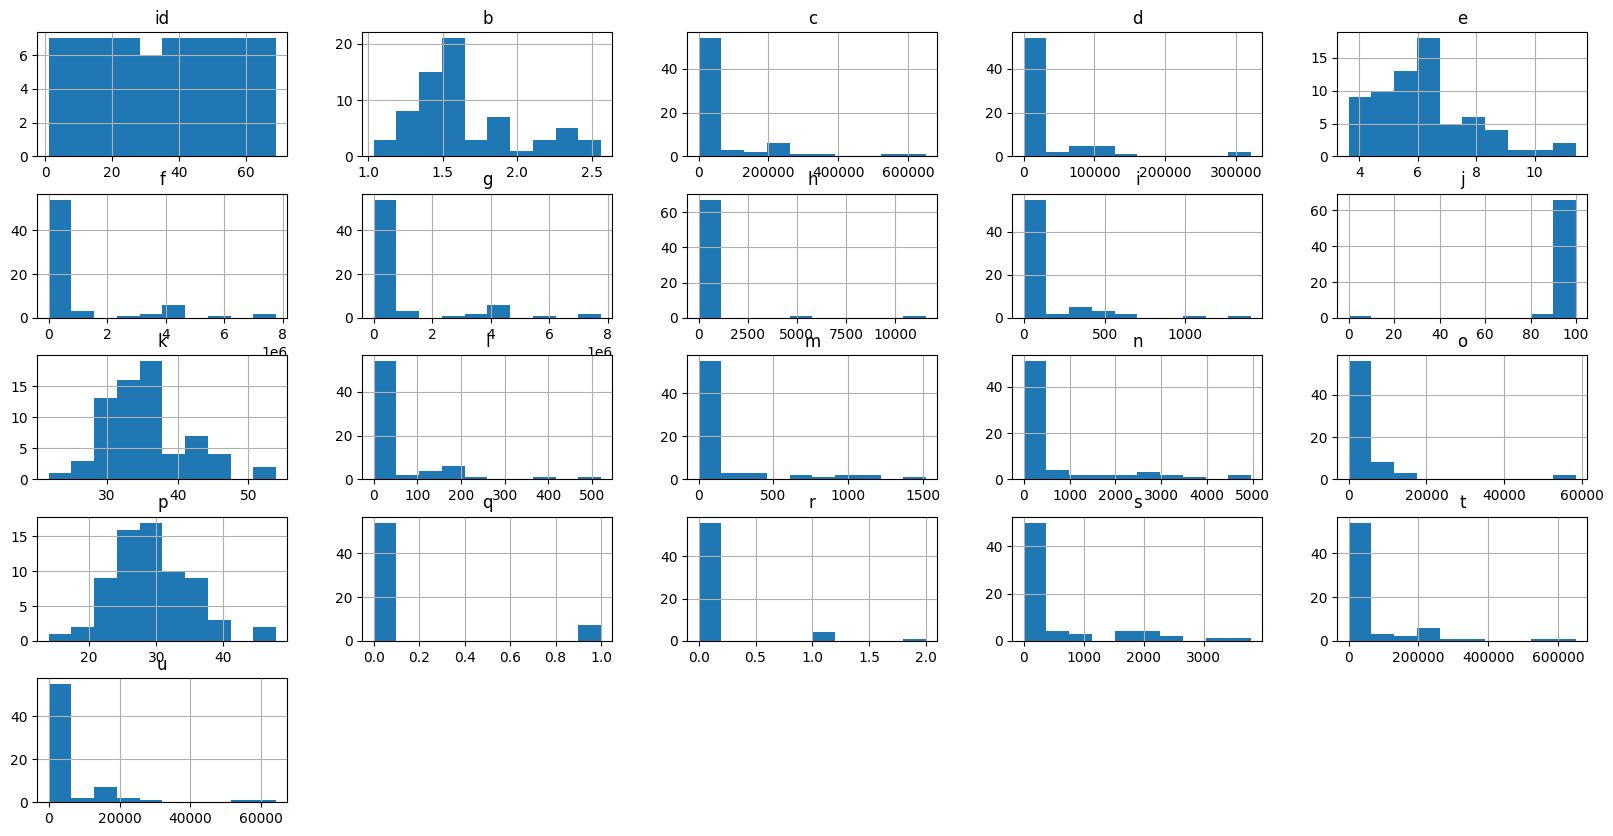

In [ ]:
x.hist(figsize=(20,10))

In [ ]:
#TOO SKEWED DATA FOR C,D,F,G,H,I,J,L,M,N,O,Q,R,S,T,U,adding 2 to prevent getting -inf(ask 2 to all or some enough)
x['c']=np.log(x['c']+2)
x['d']=np.log(x['d']+2)
x['f']=np.log(x['f']+2)
x['g']=np.log(x['g']+2)
x['h']=np.log(x['h']+2)
x['i']=np.log(x['i']+2)
x['j']=np.log(x['j']+2)
x['l']=np.log(x['l']+2)
x['m']=np.log(x['m']+2)
x['n']=np.log(x['n']+2)
x['o']=np.log(x['o']+2)
x['q']=np.log(x['q']+2)
x['r']=np.log(x['r']+2)
x['s']=np.log(x['s']+2)
x['t']=np.log(x['t']+2)
x['u']=np.log(x['u']+2)

C:\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'c'}>, <Axes: title={'center': 'd'}>,
        <Axes: title={'center': 'e'}>],
       [<Axes: title={'center': 'f'}>, <Axes: title={'center': 'g'}>,
        <Axes: title={'center': 'h'}>, <Axes: title={'center': 'i'}>,
        <Axes: title={'center': 'j'}>],
       [<Axes: title={'center': 'k'}>, <Axes: title={'center': 'l'}>,
        <Axes: title={'center': 'm'}>, <Axes: title={'center': 'n'}>,
        <Axes: title={'center': 'o'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'q'}>,
        <Axes: title={'center': 'r'}>, <Axes: title={'center': 's'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'u'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

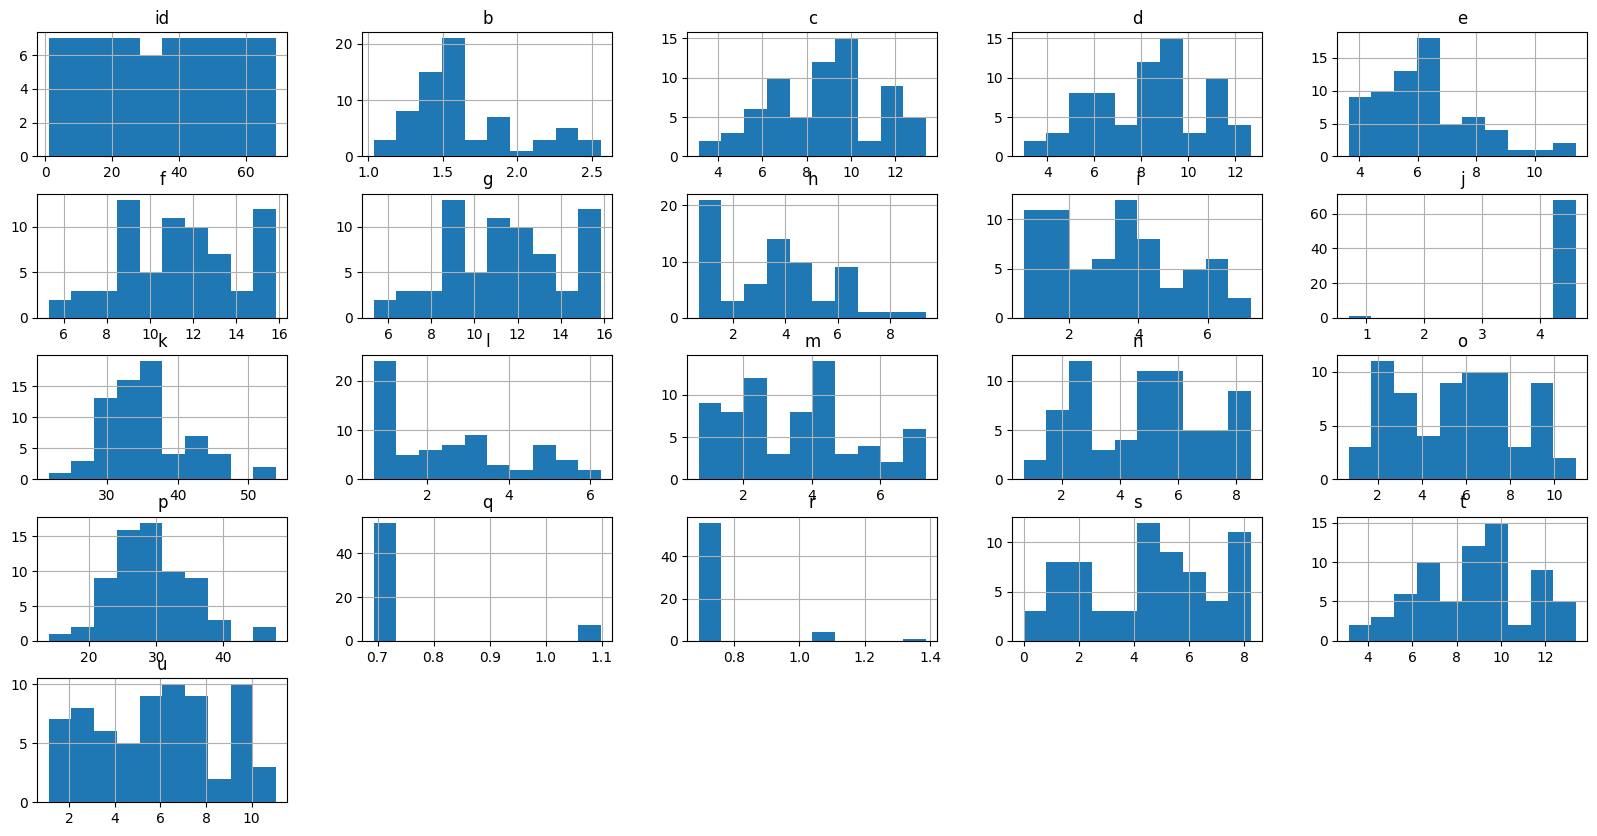

In [ ]:
x.hist(figsize=(20,10))

In [ ]:
# # x.isnull().sum()
# x['q'] = x['q'].fillna(x['q'].mean())
# x['r'] = x['r'].fillna(x['r'].mean())
# x['s'] = x['s'].fillna(x['s'].mean())
# x.isnull().sum()


id    0
b     0
c     0
d     0
e     0
f     0
g     0
h     0
i     0
j     0
k     0
l     0
m     0
n     0
o     0
p     0
q     0
r     0
s     0
t     0
u     0
dtype: int64

In [11]:
#LETS SPLIT OUR MODEL
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
#LETS TRAIN OUR MODEL
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor(random_state=0)
forest.fit(X_train,Y_train)
pred = forest.predict(X_test)
forest.score(X_test,Y_test)

0.3868976400113323

In [44]:
pred = pd.DataFrame(pred)
pred

,0
0,0.00655
1,5.48294
2,0.20097
3,0.01958
4,86.17741
5,125.44851
6,126.13158
7,6.07402
8,81.73009


(14,)

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test,pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 111.85403601970472


In [ ]:
test_df=pd.read_csv("sheet2.csv")
# test_df.isnull().sum()


In [ ]:
test_df.hist(figsize=(20,10))

In [ ]:
test_df['c']=np.log(test_df['c']+2)
test_df['d']=np.log(test_df['d']+2)
test_df['f']=np.log(test_df['f']+2)
test_df['g']=np.log(test_df['g']+2)
test_df['h']=np.log(test_df['h']+2)
test_df['i']=np.log(test_df['i']+2)
test_df['j']=np.log(test_df['j']+2)
test_df['l']=np.log(test_df['l']+2)
test_df['m']=np.log(test_df['m']+2)
test_df['n']=np.log(test_df['n']+2)
test_df['o']=np.log(test_df['o']+2)
test_df['q']=np.log(test_df['q']+2)
test_df['r']=np.log(test_df['r']+2)
test_df['s']=np.log(test_df['s']+2)
test_df['t']=np.log(test_df['t']+2)
test_df['u']=np.log(test_df['u']+2)
# test_df.isnull().sum()

In [ ]:
test_df['q'] = test_df['q'].fillna(test_df['q'].mean())
test_df['r'] = test_df['r'].fillna(test_df['r'].mean())
test_df['j'] = test_df['j'].fillna(test_df['j'].mean())
test_df['s'] = test_df['s'].fillna(test_df['s'].mean())
test_df.isnull().sum()

In [ ]:
predictions_test= forest.predict(test_df.drop(['a','v'],axis=1))

In [ ]:
submission=test_df[['id']]
submission['target'] = np.round(predictions_test,3)
submission

In [ ]:
submission.to_csv("submission.csv",index=True)
# submission.reset_index(drop=True, inplace=True)
# submission.set_index('id', inplace=True)